In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
database_path = Path("../Resources/hawaii.sqlite")

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measure_table = Base.classes.measurement
Station_table = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# How many dates are recorded 
session.query(func.count(Measure_table.date)).all()

[(19550,)]

In [10]:
# Find the earliest date in the date set. 
earliest = session.query(Measure_table.date).order_by(Measure_table.date).first()
print(f"Earliest Date: {earliest}")

Earliest Date: ('2010-01-01',)


In [11]:
# Find the most recent date in the data set.
recent = session.query(Measure_table.date).order_by(Measure_table.date.desc()).first()
print(f"Latest Date: {recent}")

Latest Date: ('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(recent[0], '%Y-%m-%d')
retrieve_date = dt.date(recent_date.year -1, recent_date.month, recent_date.day)
retrieve_date

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
data_prep = [Measure_table.date, Measure_table.prcp]
query_prep = session.query(*data_prep).filter(Measure_table.date >= retrieve_date).all()
query_prep

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [25]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
prep_df = pd.DataFrame(query_prep, columns=["Date", "Precipitation"])
prep_df = prep_df.dropna(how = "any")
prep_df = prep_df.sort_values(["Date"], ascending = True)
prep_df = prep_df.set_index("Date")
prep_df.to_csv('../Resources/Precipitation_Ready.csv')
prep_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


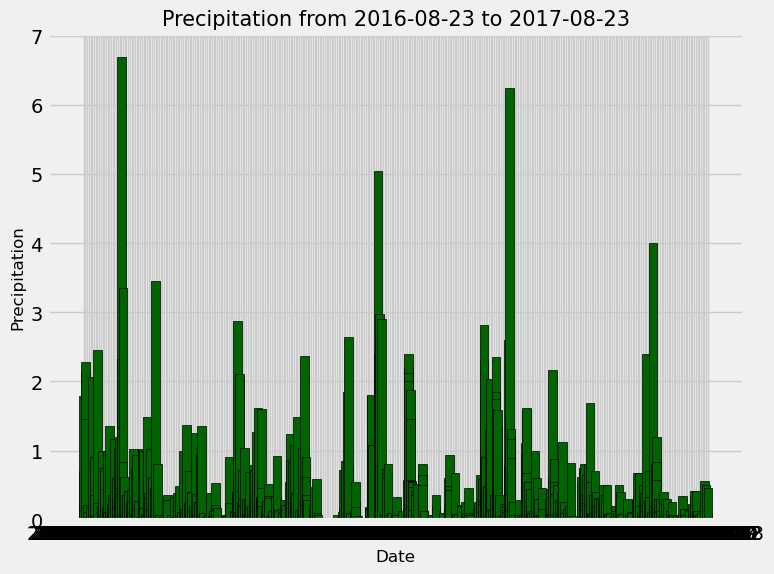

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
x_values = prep_df.index.tolist()
y_values = prep_df ['Precipitation']
plt.figure(figsize=[8,6])
plt.bar(x_values, y_values, facecolor = "darkgreen", edgecolor ="black", align = "center", width = 5)
plt.title (f"Precipitation from {retrieve_date} to {recent[0]}", fontsize = 15)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Precipitation", fontsize = 12)
plt.savefig('../Resources/Fig1_Precipitation.png')
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
prep_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station_table.id).count()

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
data_prep = [Measure_table.station,func.count(Measure_table.id)]
activestat = session.query(*data_prep).group_by(Measure_table.station).\
    order_by(func.count(Measure_table.id).desc()).all()
activestat

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
data_prep = [func.min(Measure_table.tobs), func.max(Measure_table.tobs), func.avg(Measure_table.tobs)]
active_station = session.query(*data_prep).group_by(Measure_table.station).order_by(func.count(Measure_table.id).desc()).first()
active_station

(54.0, 85.0, 71.66378066378067)

In [41]:
# Using the most active station id
querystation = session.query(Measure_table.tobs).\
    filter(Measure_table.station == activestat[0][0]).filter(Measure_table.date >= retrieve_date).all()
temp = list(np.ravel(querystation))

data_prep = [Station_table.station,Station_table.name, Station_table.latitude, Station_table.longitude, Station_table.elevation]
querystation = session.query(*data_prep).all()
stations_df = pd.DataFrame(querystation, columns=['Station', 'Name', 'Latitude', 'Longitude', 'Elevation'])
station_name = stations_df.loc[stations_df["Station"] == activestat[0][0], "Name"].tolist()[0]

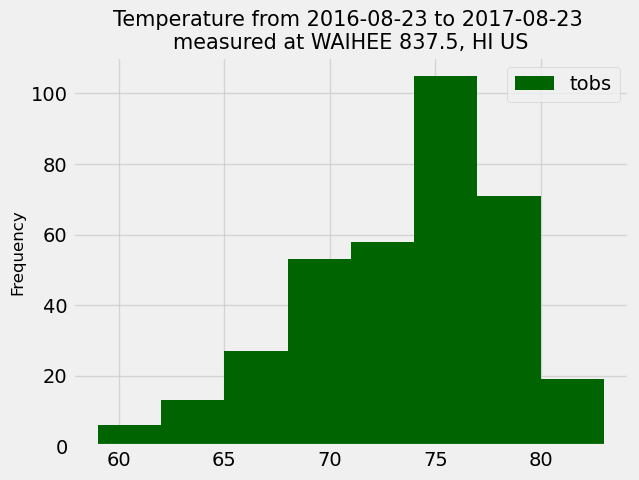

In [52]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temp,bins=8, rwidth=1.0,label='tobs', color ="darkgreen")
plt.grid(axis='both', alpha=0.75)
plt.ylabel("Frequency", fontsize = 12)
plt.title(f"Temperature from {retrieve_date} to {recent[0]} \nmeasured at {station_name}", fontsize = 15)
plt.legend()

# Close Session

In [53]:
# Close Session
session.close()